In [593]:
import numpy  as np
import pandas as pd

## Carga de datos

In [ ]:
train = pd.read_csv('train_set.csv')

In [5]:
train.head()

,ID,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,customer_city,customer_state,customer_zip_code_prefix,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,target
0,0,delivered,39.90,15.38,1.0,1.0,2018-08-08 13:03:52.000000,2018-08-08 13:15:22.255565,2018-08-15 00:00:00.000000,2018-08-13 22:11:44.366805,Sao Paulo,SP,44.0,consoles_games,59.0,434.0,3.0,5
1,1,delivered,279.99,31.82,NaN,1.0,2018-04-30 20:24:33.000000,2018-05-01 03:15:02.640177,2018-05-15 00:00:00.000000,2018-05-09 19:50:37.813505,Sao Paulo,SP,51.0,housewares,35.0,1800.0,1.0,3
2,2,delivered,144.90,16.77,1.0,1.0,2017-08-01 09:49:05.000000,2017-08-02 02:55:58.162450,2017-08-23 00:00:00.000000,2017-08-11 19:04:16.644822,NaN,PR,842.0,health_beauty,63.0,580.0,5.0,5
3,3,delivered,170.00,16.82,1.0,1.0,2017-11-29 11:47:31.000000,2017-11-29 11:57:31.647096,2017-12-20 00:00:00.000000,2017-12-08 16:31:45.044090,Santa Gertrudes,SP,135.0,watches_gifts,35.0,514.0,2.0,5
4,4,delivered,40.90,14.10,1.0,1.0,2017-10-23 14:32:55.000000,2017-10-23 14:49:10.354927,2017-11-09 00:00:00.000000,2017-11-07 21:12:19.296363,Sao Paulo,SP,40.0,health_beauty,31.0,2392.0,2.0,5


In [9]:
train.groupby('target').count()

,ID,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,customer_city,customer_state,customer_zip_code_prefix,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty
target,,,,,,,,,,,,,,,,,
1,6584,6251,6276,6295,6261,6269,6268,6245,6283,5363,6318,6265,6244,6272,6279,6264,6279
2,1892,1789,1783,1802,1799,1808,1805,1793,1816,1720,1808,1799,1789,1811,1805,1806,1800
3,4802,4570,4581,4556,4562,4573,4567,4557,4573,4453,4596,4601,4546,4562,4572,4564,4549
4,10655,10134,10124,10153,10121,10145,10153,10135,10132,10046,10096,10143,10146,10151,10162,10153,10144
5,31267,29737,29736,29702,29693,29787,29773,29750,29685,29616,29737,29744,29715,29805,29690,29706,29705


## Descriptivo 

In [91]:
columns = train.columns

In [34]:
train = pd.DataFrame(train)

In [71]:
train.pivot_table('ID','target','order_status',aggfunc=np.count_nonzero)

order_status,canceled,delivered,invoiced,processing,shipped,unavailable
target,,,,,,
1,198.0,5359.0,121.0,178.0,390.0,5.0
2,15.0,1718.0,6.0,7.0,43.0,NaN
3,17.0,4454.0,17.0,9.0,73.0,NaN
4,7.0,10062.0,9.0,1.0,55.0,NaN
5,21.0,29616.0,16.0,7.0,76.0,NaN


In [72]:
train.groupby('target').describe()

ID                                                       \
          count          mean           std   min       25%      50%   
target                                                                 
1        6584.0  27264.714611  15740.764206   8.0  13942.75  27075.5   
2        1892.0  27615.680761  15748.392783  37.0  14180.75  27668.5   
3        4802.0  27535.063099  16091.671738   1.0  13686.50  27410.5   
4       10655.0  27569.071516  15892.456170  11.0  13757.50  27473.0   
5       31267.0  27689.283302  15977.129208   0.0  13776.50  27760.0   

                          order_products_value              ...  \
             75%      max                count        mean  ...   
target                                                      ...   
1       40503.50  55198.0               6276.0  146.927819  ...   
2       40876.75  55182.0               1783.0  129.583797  ...   
3       41671.00  55192.0               4581.0  120.415355  ...   
4       41310.00  55199.0              10124.0  127.404472  ...   
5       41584.50  55197.0              29736.0  128.290388  ...   

       product_description_lenght         product_photos_qty            \
                              75%     max              count      mean   
target                                                                   
1                          956.00  3992.0             6279.0  2.193343   
2                          908.75  3859.0             1800.0  2.157222   
3                          964.00  3979.0             4549.0  2.282040   
4                          969.00  3949.0            10144.0  2.304614   
5                         1001.00  3992.0            29705.0  2.296011   

                                            
             std  min  25%  50%  75%   max  
target                                      
1       1.687769  1.0  1.0  2.0  3.0  17.0  
2       1.712607  1.0  1.0  1.0  3.0  17.0  
3       1.711821  1.0  1.0  2.0  3.0  13.0  
4       1.752247  1.0  1.0  2.0  3.0  17.0  
5       1.753552  1.0  1.0  2.0  3.0  17.0  

[5 rows x 72 columns]

In [381]:
31267/(10655+4802+1892+6584+31267)

0.5664311594202899

In [89]:
train['fecha_deliveried_estdelivery']  =  (pd.to_datetime(train['order_delivered_customer_date']) - pd.to_datetime(train['order_estimated_delivery_date'])).dt.days
train['fecha_deliveried_orderaproved']  =  (pd.to_datetime(train['order_delivered_customer_date']) - pd.to_datetime(train['order_aproved_at'])).dt.days
train['fecha_deliveried_purchased']  =  (pd.to_datetime(train['order_delivered_customer_date']) - pd.to_datetime(train['order_purchase_timestamp'])).dt.days

In [90]:
train

,ID,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,...,customer_state,customer_zip_code_prefix,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,target,fecha_deliveried_estdelivery,fecha_deliveried_orderaproved,fecha_deliveried_purchased
0,0,delivered,39.90,15.38,1.0,1.0,2018-08-08 13:03:52.000000,2018-08-08 13:15:22.255565,2018-08-15 00:00:00.000000,2018-08-13 22:11:44.366805,...,SP,44.0,consoles_games,59.0,434.0,3.0,5,-2.0,5.0,5.0
1,1,delivered,279.99,31.82,NaN,1.0,2018-04-30 20:24:33.000000,2018-05-01 03:15:02.640177,2018-05-15 00:00:00.000000,2018-05-09 19:50:37.813505,...,SP,51.0,housewares,35.0,1800.0,1.0,3,-6.0,8.0,8.0
2,2,delivered,144.90,16.77,1.0,1.0,2017-08-01 09:49:05.000000,2017-08-02 02:55:58.162450,2017-08-23 00:00:00.000000,2017-08-11 19:04:16.644822,...,PR,842.0,health_beauty,63.0,580.0,5.0,5,-12.0,9.0,10.0
3,3,delivered,170.00,16.82,1.0,1.0,2017-11-29 11:47:31.000000,2017-11-29 11:57:31.647096,2017-12-20 00:00:00.000000,2017-12-08 16:31:45.044090,...,SP,135.0,watches_gifts,35.0,514.0,2.0,5,-12.0,9.0,9.0
4,4,delivered,40.90,14.10,1.0,1.0,2017-10-23 14:32:55.000000,2017-10-23 14:49:10.354927,2017-11-09 00:00:00.000000,2017-11-07 21:12:19.296363,...,SP,40.0,health_beauty,31.0,2392.0,2.0,5,-2.0,15.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55195,55195,delivered,49.00,13.71,1.0,1.0,2018-04-27 16:17:04.000000,2018-04-27 17:11:52.642510,2018-05-18 00:00:00.000000,2018-05-08 13:51:57.886946,...,SP,48.0,toys,54.0,77.0,2.0,5,-10.0,10.0,10.0
55196,55196,delivered,62.80,34.24,NaN,1.0,2017-11-02 22:41:18.000000,2017-11-03 00:35:49.562322,2017-12-01 00:00:00.000000,2017-11-24 21:16:58.154968,...,PB,584.0,market_place,55.0,1626.0,1.0,5,-7.0,21.0,21.0
55197,55197,delivered,24.90,7.43,1.0,1.0,2018-07-23 18:33:22.000000,NaN,2018-08-01 00:00:00.000000,2018-07-25 21:16:34.511924,...,SP,74.0,bed_bath_table,57.0,74.0,1.0,5,-7.0,NaN,2.0
55198,55198,delivered,39.99,12.79,1.0,1.0,2018-04-21 11:47:23.000000,2018-04-24 19:20:57.531537,2018-05-16 00:00:00.000000,2018-04-30 15:06:52.305277,...,SP,190.0,health_beauty,NaN,216.0,1.0,1,-16.0,5.0,9.0


In [92]:
columns

Index(['ID', 'order_status', 'order_products_value', 'order_freight_value',
       'order_items_qty', 'order_sellers_qty', 'order_purchase_timestamp',
       'order_aproved_at', 'order_estimated_delivery_date',
       'order_delivered_customer_date', 'customer_city', 'customer_state',
       'customer_zip_code_prefix', 'product_category_name_english',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'target', 'fecha_deliveried_estdelivery',
       'fecha_deliveried_orderaproved', 'fecha_deliveried_purchased'],
      dtype='object')

In [159]:
date_columns = ['order_delivered_customer_date','order_estimated_delivery_date','order_aproved_at','order_purchase_timestamp']
cities_columns = ['customer_city']
product_name = ['product_category_name_english']
target = ['target']
ID = ['ID']

In [161]:
columns_f=[]
for c in columns : 
    if c not in date_columns and c not in cities_columns and c not in product_name and c not in target and c not in ID: 
            columns_f.append(c)
        

In [162]:
columns_f

['order_status',
 'order_products_value',
 'order_freight_value',
 'order_items_qty',
 'order_sellers_qty',
 'customer_state',
 'customer_zip_code_prefix',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'fecha_deliveried_estdelivery',
 'fecha_deliveried_orderaproved',
 'fecha_deliveried_purchased']

In [163]:
train_f = pd.get_dummies(train[columns_f])

In [164]:
train_f.head()

,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,customer_zip_code_prefix,product_name_lenght,product_description_lenght,product_photos_qty,fecha_deliveried_estdelivery,fecha_deliveried_orderaproved,...,customer_state_PR,customer_state_RJ,customer_state_RN,customer_state_RO,customer_state_RR,customer_state_RS,customer_state_SC,customer_state_SE,customer_state_SP,customer_state_TO
0,39.90,15.38,1.0,1.0,44.0,59.0,434.0,3.0,-2.0,5.0,...,0,0,0,0,0,0,0,0,1,0
1,279.99,31.82,NaN,1.0,51.0,35.0,1800.0,1.0,-6.0,8.0,...,0,0,0,0,0,0,0,0,1,0
2,144.90,16.77,1.0,1.0,842.0,63.0,580.0,5.0,-12.0,9.0,...,1,0,0,0,0,0,0,0,0,0
3,170.00,16.82,1.0,1.0,135.0,35.0,514.0,2.0,-12.0,9.0,...,0,0,0,0,0,0,0,0,1,0
4,40.90,14.10,1.0,1.0,40.0,31.0,2392.0,2.0,-2.0,15.0,...,0,0,0,0,0,0,0,0,1,0


In [165]:
train_f.columns[:100]

Index(['order_products_value', 'order_freight_value', 'order_items_qty',
       'order_sellers_qty', 'customer_zip_code_prefix', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty',
       'fecha_deliveried_estdelivery', 'fecha_deliveried_orderaproved',
       'fecha_deliveried_purchased', 'order_status_canceled',
       'order_status_delivered', 'order_status_invoiced',
       'order_status_processing', 'order_status_shipped',
       'order_status_unavailable', 'customer_state_AC', 'customer_state_AL',
       'customer_state_AM', 'customer_state_AP', 'customer_state_BA',
       'customer_state_CE', 'customer_state_DF', 'customer_state_ES',
       'customer_state_GO', 'customer_state_MA', 'customer_state_MG',
       'customer_state_MS', 'customer_state_MT', 'customer_state_PA',
       'customer_state_PB', 'customer_state_PE', 'customer_state_PI',
       'customer_state_PR', 'customer_state_RJ', 'customer_state_RN',
       'customer_state_RO', 'customer_stat

## Entrenando

In [547]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier

In [548]:
sc = StandardScaler()
Xs = sc.fit_transform(train_f)

In [468]:
train_scale = pd.DataFrame(Xs, columns=train_f.columns)
train_scale['target'] = train['target'].values.astype('str')

In [469]:
train_scale = pd.get_dummies(train_scale)
train_scale

,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,customer_zip_code_prefix,product_name_lenght,product_description_lenght,product_photos_qty,fecha_deliveried_estdelivery,fecha_deliveried_orderaproved,...,customer_state_RS,customer_state_SC,customer_state_SE,customer_state_SP,customer_state_TO,target_1,target_2,target_3,target_4,target_5
0,-0.442685,-0.326932,-0.215565,-0.206156,-1.044263,1.000651,-0.518746,0.413898,1.002777,-0.725413,...,-0.235305,-0.193439,-0.058146,1.258293,-0.04933,0,0,0,0,1
1,0.740825,0.506397,NaN,-0.206156,-1.020715,-1.362070,1.527816,-0.734889,0.611524,-0.407937,...,-0.235305,-0.193439,-0.058146,1.258293,-0.04933,0,0,1,0,0
2,0.074906,-0.256474,-0.215565,-0.206156,1.640190,1.394438,-0.300007,1.562685,0.024644,-0.302112,...,-0.235305,-0.193439,-0.058146,-0.794727,-0.04933,0,0,0,0,1
3,0.198635,-0.253940,-0.215565,-0.206156,-0.738141,-1.362070,-0.398889,-0.160496,0.024644,-0.302112,...,-0.235305,-0.193439,-0.058146,1.258293,-0.04933,0,0,0,0,1
4,-0.437756,-0.391814,-0.215565,-0.206156,-1.057719,-1.755857,2.414760,-0.160496,1.002777,0.332840,...,-0.235305,-0.193439,-0.058146,1.258293,-0.04933,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55195,-0.397827,-0.411583,-0.215565,-0.206156,-1.030807,0.508418,-1.053609,-0.160496,0.220271,-0.196286,...,-0.235305,-0.193439,-0.058146,1.258293,-0.04933,0,0,0,0,1
55196,-0.329801,0.629064,NaN,-0.206156,0.772284,0.606864,1.267127,-0.734889,0.513710,0.967793,...,-0.235305,-0.193439,-0.058146,-0.794727,-0.04933,0,0,0,0,1
55197,-0.516627,-0.729911,-0.215565,-0.206156,-0.943344,0.803758,-1.058104,-0.734889,0.513710,NaN,...,-0.235305,-0.193439,-0.058146,1.258293,-0.04933,0,0,0,0,1
55198,-0.442242,-0.458217,-0.215565,-0.206156,-0.553123,NaN,-0.845357,-0.734889,-0.366609,-0.725413,...,-0.235305,-0.193439,-0.058146,1.258293,-0.04933,1,0,0,0,0


In [470]:
train_scale.describe()

,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,customer_zip_code_prefix,product_name_lenght,product_description_lenght,product_photos_qty,fecha_deliveried_estdelivery,fecha_deliveried_orderaproved,...,customer_state_RS,customer_state_SC,customer_state_SE,customer_state_SP,customer_state_TO,target_1,target_2,target_3,target_4,target_5
count,5.250000e+04,5.250800e+04,5.243600e+04,5.258200e+04,5.244000e+04,5.250800e+04,5.249300e+04,5.247700e+04,4.867200e+04,4.871000e+04,...,5.520000e+04,5.520000e+04,5.520000e+04,5.520000e+04,5.520000e+04,55200.000000,55200.000000,55200.000000,55200.000000,55200.000000
mean,5.955025e-17,9.553652e-17,-1.303574e-16,4.074182e-17,-3.739699e-17,-2.328872e-16,-5.238413e-17,7.325183e-17,3.503662e-17,9.744253e-17,...,-5.663746e-18,3.089316e-17,3.835901e-17,-9.087739e-17,-2.059544e-18,0.119275,0.034275,0.086993,0.193025,0.566431
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,...,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,0.324115,0.181937,0.281827,0.394676,0.495572
min,-6.295112e-01,-1.106531e+00,-2.155649e-01,-2.061565e-01,-1.158638e+00,-4.315472e+00,-1.156986e+00,-7.348893e-01,-1.249545e+01,-1.995317e+00,...,-2.353054e-01,-1.934386e-01,-5.814600e-02,-7.947272e-01,-4.932995e-02,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-4.076862e-01,-4.217210e-01,-2.155649e-01,-2.061565e-01,-8.020568e-01,-6.729431e-01,-6.595785e-01,-7.348893e-01,-4.644220e-01,-6.195878e-01,...,-2.353054e-01,-1.934386e-01,-5.814600e-02,-7.947272e-01,-4.932995e-02,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.302755e-01,-2.554607e-01,-2.155649e-01,-2.061565e-01,-3.344641e-01,3.115242e-01,-2.850246e-01,-1.604957e-01,-7.316902e-02,-1.962864e-01,...,-2.353054e-01,-1.934386e-01,-5.814600e-02,-7.947272e-01,-4.932995e-02,0.000000,0.000000,0.000000,0.000000,1.000000
75%,7.983582e-02,6.134632e-02,-2.155649e-01,-2.061565e-01,7.924678e-01,8.037579e-01,3.037742e-01,4.138979e-01,4.158972e-01,3.328404e-01,...,-2.353054e-01,-1.934386e-01,-5.814600e-02,1.258293e+00,-4.932995e-02,0.000000,0.000000,0.000000,0.000000,1.000000
max,6.561236e+01,3.376556e+01,4.088757e+01,4.267523e+01,2.168334e+00,2.280459e+00,4.811905e+00,8.455409e+00,1.958729e+01,2.075713e+01,...,4.249797e+00,5.169600e+00,1.719809e+01,1.258293e+00,2.027166e+01,1.000000,1.000000,1.000000,1.000000,1.000000


In [471]:
1-0.119275,1-0.034275,1-0.086993,1-0.193025,1-0.566431

(0.880725, 0.965725, 0.913007, 0.806975, 0.433569)

In [472]:
target_fil =['target_1','target_2','target_3','target_4','target_5']

In [473]:
columns_base=[]
for c in train_scale.columns : 
    if c not in target_fil :
        columns_base.append(c)

In [474]:
target = train_scale.loc[:,target_fil].values
Base = train_scale.loc[:,columns_base].values

In [475]:
from sklearn.model_selection import train_test_split

In [476]:
X_Base, X_test, y_Base, y_test = train_test_split(Base,target, test_size=0.33, random_state=42)

In [477]:
gb_hist=[]
for ii in range(5):
    gb = HistGradientBoostingClassifier().fit(X_Base,y_Base[:,ii])
    gb_hist.append(gb)
    print('Target_{0:d}, R^2={1:.2f}'.format(ii+1,gb.score(X_Base,y_Base[:,ii])))

Target_1, R^2=0.91
Target_2, R^2=0.97
Target_3, R^2=0.91
Target_4, R^2=0.81
Target_5, R^2=0.67


In [478]:
for ii in range(5):
    print('Target_{0:d}, R^2={1:.2f}'.format(ii+1,gb_hist[ii].score(X_test,y_test[:,ii])))

Target_1, R^2=0.90
Target_2, R^2=0.97
Target_3, R^2=0.92
Target_4, R^2=0.81
Target_5, R^2=0.65


In [479]:
from sklearn.metrics import classification_report, log_loss, roc_auc_score

In [480]:
y_pred_hist=[]
for ii in range(len(target_fil)):
    y_pred = gb_hist[ii].predict(X_test)
    y_pred_hist.append(y_pred)

In [482]:
y_predict= np.array(y_pred_hist).transpose()

In [483]:
y_predict[:,1] ,y_test[:,1]

(array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8))

In [484]:
for ii in range(5):
    print('ROC AUC:',roc_auc_score(y_test[:,ii], y_predict[:,ii]))

ROC AUC: 0.6591614563730092
ROC AUC: 0.5
ROC AUC: 0.5
ROC AUC: 0.5
ROC AUC: 0.6064750633962654


In [485]:
y_test[:,1]

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [509]:
import pickle

# save the iris classification model as a pickle file
model_pkl_file = "model_hgb_first_version.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(gb_hist, file)

with open(model_pkl_file, 'rb') as file:  
model_first_version = pickle.load(file)

In [510]:
with open(model_pkl_file, 'rb') as file:  
    model_first_version = pickle.load(file)


## Segunda versión

In [549]:
train_scale1 = pd.DataFrame(Xs, columns=train_f.columns)
train_scale1['target'] = train['target'].values.astype('str')

In [550]:
train_scale1=train_scale1.dropna()

In [551]:
target = train_scale1.loc[:,['target']].values
Base = train_scale1.loc[:,columns_base].values

In [552]:
from sklearn.model_selection import train_test_split

In [553]:
X_Base, X_test, y_Base, y_test = train_test_split(Base,target, test_size=0.33, random_state=42,stratify=target)

In [554]:
gb_hist=[]
for ii in range(1):
    gb = HistGradientBoostingClassifier().fit(X_Base,y_Base[:,ii])
    gb_hist.append(gb)
    print('Target_{0:d}, R^2={1:.2f}'.format(ii+1,gb.score(X_Base,y_Base[:,ii])))

Target_1, R^2=0.62


In [555]:
for ii in range(1):
    print('Target_{0:d}, R^2={1:.2f}'.format(ii+1,gb_hist[ii].score(X_test,y_test[:,ii])))

Target_1, R^2=0.60


In [556]:
y_pred_hist=[]
for ii in range(1):
    y_pred = gb_hist[ii].predict(X_test)
    y_pred_hist.append(y_pred)

In [558]:
import pickle

# save the iris classification model as a pickle file
model_pkl_file = "model_hgb_second_version.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(gb_hist, file)

with open(model_pkl_file, 'rb') as file:  
    model_second_version = pickle.load(file)

## tercera version

In [638]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

In [639]:
train_scale2 = pd.DataFrame(Xs, columns=train_f.columns)
train_scale2['target'] = train['target']

In [640]:
train_scale2 =train_scale2.dropna()

In [641]:
target = train_scale2.loc[:,['target']].values
Base = train_scale2.loc[:,columns_base].values

Class=5, n=16982 (57.576%)
Class=1, n=16982 (57.576%)
Class=4, n=16982 (57.576%)
Class=2, n=16982 (57.576%)
Class=3, n=16982 (57.576%)


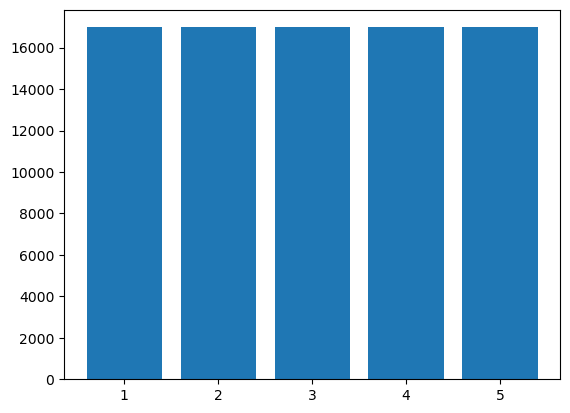

In [642]:
#target = LabelEncoder().fit_transform(target)
# transform the dataset
oversample = SMOTE()
Base1, target1 = oversample.fit_resample(Base, target)
# summarize distribution
counter = Counter(target1)
for k,v in counter.items():
 per = v / len(target) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [647]:
target1.shape

(84910,)

In [648]:
Base1.shape

(84910, 44)

In [643]:
from sklearn.model_selection import train_test_split

In [649]:
X_Base, X_test, y_Base, y_test = train_test_split(Base1,target1, test_size=0.33, random_state=42,stratify=target1)

In [650]:
gb_hist=[]
gb = HistGradientBoostingClassifier().fit(X_Base,y_Base)
print('Target_{0:d}, R^2={1:.2f}'.format(ii+1,gb.score(X_Base,y_Base)))

Target_1, R^2=0.69


In [651]:
print('Target_{0:d}, R^2={1:.2f}'.format(ii+1,gb.score(X_test,y_test)))

Target_1, R^2=0.62


In [652]:
y_pred = gb.predict(X_test)

In [653]:
y_pred[0:100],y_test[0:100]

(array([2, 2, 5, 4, 5, 1, 4, 4, 5, 5, 5, 4, 2, 3, 5, 5, 5, 1, 2, 1, 4, 5,
        4, 5, 3, 5, 4, 2, 2, 1, 5, 3, 1, 1, 5, 5, 4, 2, 3, 5, 3, 4, 4, 4,
        5, 2, 5, 5, 4, 4, 2, 5, 3, 5, 4, 3, 4, 1, 5, 4, 5, 1, 1, 2, 5, 1,
        1, 5, 3, 2, 2, 5, 5, 1, 3, 4, 5, 2, 5, 3, 5, 2, 2, 4, 3, 3, 4, 5,
        4, 4, 1, 5, 2, 3, 3, 1, 1, 5, 1, 3], dtype=int64),
 array([3, 1, 5, 4, 4, 1, 5, 4, 3, 4, 4, 4, 2, 1, 1, 5, 1, 4, 2, 2, 4, 5,
        2, 5, 3, 4, 1, 2, 4, 2, 5, 3, 1, 1, 5, 5, 4, 4, 3, 5, 1, 2, 4, 3,
        5, 2, 5, 2, 3, 4, 2, 3, 3, 5, 4, 3, 1, 1, 4, 3, 5, 1, 1, 3, 5, 1,
        3, 1, 3, 2, 2, 5, 1, 5, 4, 4, 5, 1, 5, 3, 2, 4, 2, 4, 4, 3, 1, 5,
        2, 4, 1, 1, 2, 3, 3, 1, 1, 5, 1, 3], dtype=int64))

In [654]:
import pickle

# save the iris classification model as a pickle file
model_pkl_file = "model_hgb_tercer_version.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(gb, file)

In [655]:
model_pkl_file = "model_hgb_tercer_version.pkl"  
with open(model_pkl_file, 'rb') as file:  
    model_tercer_version = pickle.load(file)


In [463]:
model.score(Base1,target)

0.589963768115942

## cuarta version 

In [677]:
train_scale1 = pd.DataFrame(Xs, columns=train_f.columns)
train_scale1['target'] = train['target'].values
train_scale1 = train_scale1.dropna()
target = train_scale1.loc[:,['target']].values
Base = train_scale1.loc[:,columns_base].values

In [678]:
X_Base, X_test, y_Base, y_test = train_test_split(Base,target, test_size=0.33, random_state=42,stratify=target)

In [686]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lm = LinearRegression()

lm.fit(X_Base, y_Base)

predictions_train = lm.predict(X_Base)
predictions_test = lm.predict(X_test)

mean_absolute_error(predictions_train, y_Base)
np.sqrt(mean_squared_error(predictions_train, y_Base))
mean_absolute_error(predictions_test, y_test)
np.sqrt(mean_squared_error(predictions_test, y_test))
r2_score(predictions_train, y_Base) ,r2_score(predictions_test, y_test)

(-5.162242080440373, -0.00041109968892572013)

In [687]:
predictions_test ,y_test 

(array([[4.37998962],
        [4.42573547],
        [3.9332428 ],
        ...,
        [2.89260864],
        [4.33010864],
        [3.31425476]]),
 array([[5],
        [5],
        [1],
        ...,
        [1],
        [3],
        [5]], dtype=int64))

## Aplicando al test

In [11]:
test = pd.read_csv('test_set.csv')
test.head()

,ID,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,customer_city,customer_state,customer_zip_code_prefix,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty
0,0,delivered,30.00,28.20,2.0,1.0,2017-06-22 20:28:16.000000,2017-06-22 20:42:51.013492,2017-07-14 00:00:00.000000,2017-09-19 15:17:37.767855,NaN,SP,48.0,health_beauty,17.0,547.0,1.0
1,1,delivered,89.90,12.33,1.0,1.0,NaN,2017-11-20 23:34:44.641435,2017-12-01 00:00:00.000000,2017-11-23 14:41:51.640086,Caieiras,SP,NaN,bed_bath_table,58.0,188.0,1.0
2,2,delivered,890.00,86.71,1.0,1.0,2018-02-12 12:31:32.000000,2018-02-15 03:55:50.384756,2018-03-09 00:00:00.000000,2018-02-27 15:19:06.698500,Sao Caetano do Sul,SP,95.0,health_beauty,57.0,537.0,1.0
3,3,delivered,85.00,17.84,1.0,NaN,2017-07-24 05:21:16.000000,NaN,2017-08-15 00:00:00.000000,2017-07-31 19:42:27.819239,Curitiba,PR,813.0,stationery,56.0,303.0,3.0
4,4,delivered,168.98,25.31,1.0,1.0,2018-03-29 22:20:33.000000,2018-03-29 22:30:18.256631,NaN,2018-05-15 15:05:44.342452,Aracaju,SE,490.0,bed_bath_table,60.0,496.0,2.0


In [501]:
test['fecha_deliveried_estdelivery']  =  (pd.to_datetime(test['order_delivered_customer_date']) - pd.to_datetime(test['order_estimated_delivery_date'])).dt.days
test['fecha_deliveried_orderaproved']  =  (pd.to_datetime(test['order_delivered_customer_date']) - pd.to_datetime(test['order_aproved_at'])).dt.days
test['fecha_deliveried_purchased']  =  (pd.to_datetime(test['order_delivered_customer_date']) - pd.to_datetime(test['order_purchase_timestamp'])).dt.days

In [502]:
columns= test.columns

In [503]:
date_columns = ['order_delivered_customer_date','order_estimated_delivery_date','order_aproved_at','order_purchase_timestamp']
cities_columns = ['customer_city']
product_name = ['product_category_name_english']
ID = ['ID']

In [504]:
columns_f=[]
for c in columns : 
    if c not in date_columns and c not in cities_columns and c not in product_name and c not in ID: 
            columns_f.append(c)

In [505]:
test_f = pd.get_dummies(test[columns_f])

In [506]:
sc = StandardScaler()
Xs = sc.fit_transform(test_f)

In [507]:
test_scale = pd.DataFrame(Xs, columns=test_f.columns)

In [661]:
y_pred_hist=[]
for ii in range(5):
    y_pred = model_first_version[ii].predict(test_scale.values)
    y_pred_hist.append(y_pred)

In [662]:
y_predict= np.array(y_pred_hist).transpose()

In [663]:
y_pred = pd.DataFrame(y_predict,columns=['1','2','3','4','5'])

In [664]:
base_final = y_pred.join(test['ID'])

In [665]:
base_final

,1,2,3,4,5,ID
0,0,0,0,0,0,0
1,0,0,0,0,1,1
2,0,0,0,0,1,2
3,0,0,0,0,1,3
4,0,0,0,0,0,4
...,...,...,...,...,...,...
13795,0,0,0,0,1,13795
13796,0,0,0,0,1,13796
13797,0,0,0,0,1,13797
13798,0,0,0,0,1,13798


In [668]:
conditionlist = [
    (base_final['1']==1),
    (base_final['2']==1),
    (base_final['3']==1),
    (base_final['4']==1)]
choicelist = [1, 2, 3, 4]
base_final['target'] = np.select(conditionlist, choicelist, default=5)

In [670]:
base_final.groupby('target').count()

,1,2,3,4,5,ID
target,,,,,,
1,583,583,583,583,583,583
5,13217,13217,13217,13217,13217,13217


In [671]:
base = base_final[['ID','target']]

In [672]:
base.to_csv('submission_primer_version.csv',index=False)

In [ ]:
# segunda Version

In [ ]:
model_second_version

In [584]:
y_pred_hist=[]
for ii in range(1):
    y_pred = model_second_version[ii].predict(test_scale.values)
    y_pred_hist.append(y_pred)

In [585]:
y_pred_hist

[array(['1', '5', '5', ..., '5', '5', '5'], dtype=object)]

In [586]:
y_pred = pd.DataFrame(np.array(y_pred_hist).transpose(),columns=['target'])

In [587]:
base_final2 = y_pred.join(test['ID'])
base = base_final2[['ID','target']]

In [589]:
base

,ID,target
0,0,1
1,1,5
2,2,5
3,3,5
4,4,5
...,...,...
13795,13795,5
13796,13796,5
13797,13797,5
13798,13798,5


In [590]:
base.groupby('target').count()

,ID
target,
1,849
2,1
3,4
4,21
5,12925


In [592]:
base.to_csv('submission.csv',index=False)

In [591]:
base.count()

ID        13800
target    13800
dtype: int64

## tercera version

In [656]:
y_pred = model_tercer_version.predict(test_scale.values)

In [657]:
y_pred = pd.DataFrame(np.array(y_pred).transpose(),columns=['target'])

In [658]:
base_final2 = y_pred.join(test['ID'])
base = base_final2[['ID','target']]

In [659]:
base.groupby('target').count()

,ID
target,
1,2768
2,9243
3,1591
4,157
5,41


In [660]:
base.to_csv('submission_tercer_version.csv',index=False)